Matplotlib is building the font cache; this may take a moment.


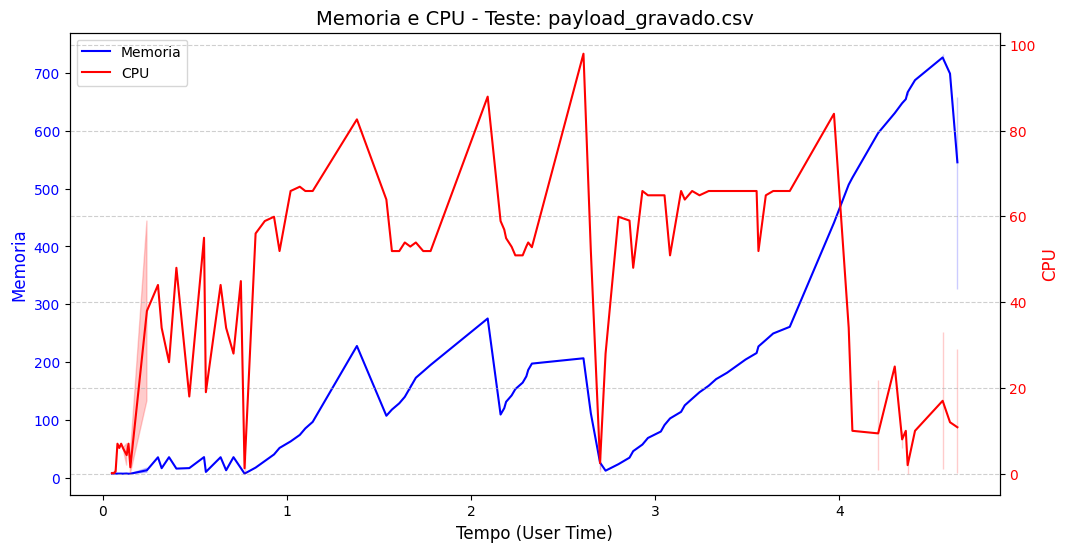

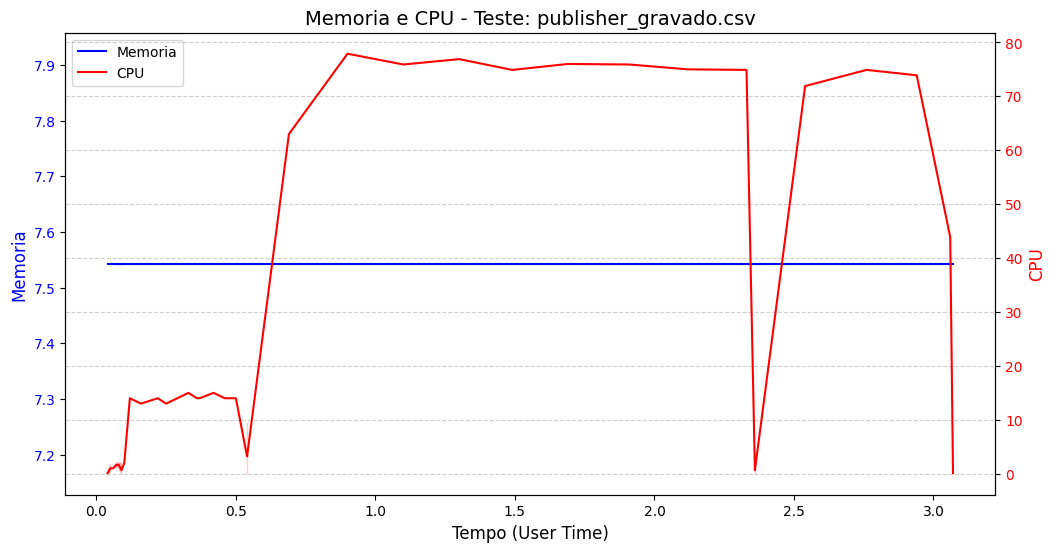

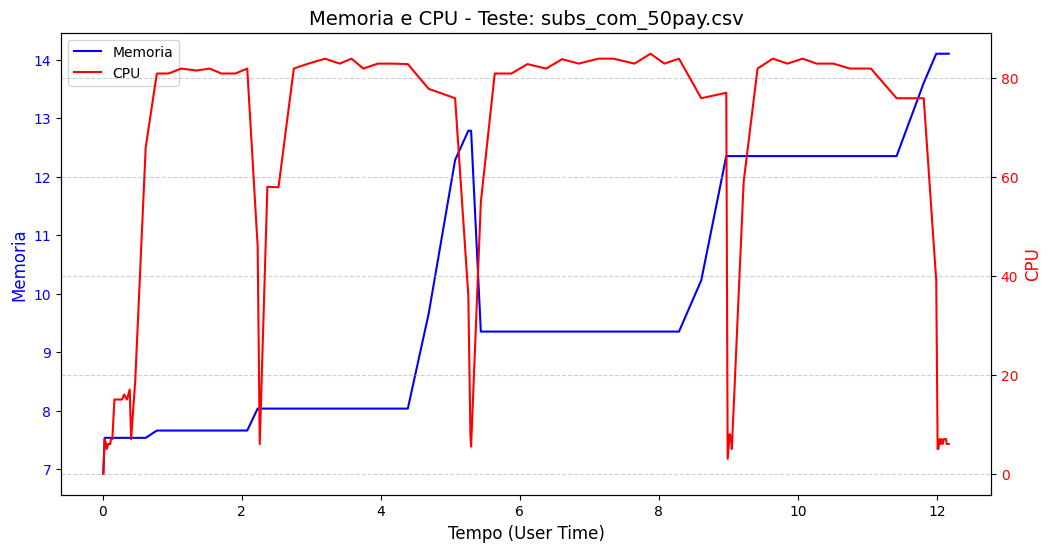

In [ ]:
# ===================================================================
#           PLOTAR GRÁFICOS A PARTIR DE CSV
# ===================================================================

# 1. Imports necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# 2. Lista completa com os seus arquivos CSV
# Verifique se os nomes estão exatamente iguais aos seus arquivos.
arquivos_csv = [
    'payload/payload_gravado.csv',
    'publisher/publisher_gravado.csv',
    'subs_50_pay/subs_com_50pay.csv'
]

# --- Loop para gerar um gráfico para cada arquivo ---
for caminho_arquivo in arquivos_csv:
    try:
        # Carrega o arquivo CSV
        df = pd.read_csv(caminho_arquivo)

        # --------------------------------------------------------------------------
        # Colunas do CSV.
        coluna_tempo = 'user_time'
        coluna_memoria = 'memoria'
        coluna_cpu = 'cpu'
        # --------------------------------------------------------------------------

        # Cria a figura e o primeiro eixo
        fig, ax1 = plt.subplots(figsize=(12, 6))

        # Plota os dados de 'Memoria'
        sns.lineplot(data=df, x=coluna_tempo, y=coluna_memoria, ax=ax1, color='blue', label='Memoria')
        ax1.set_ylabel('Memoria', color='blue', fontsize=12)
        ax1.tick_params(axis='y', labelcolor='blue')

        # Cria o segundo eixo Y
        ax2 = ax1.twinx()

        # Plota os dados de 'CPU'
        sns.lineplot(data=df, x=coluna_tempo, y=coluna_cpu, ax=ax2, color='red', label='CPU')
        ax2.set_ylabel('CPU', color='red', fontsize=12)
        ax2.tick_params(axis='y', labelcolor='red')

        # Extrai o nome do arquivo para usar no título
        nome_do_teste = os.path.basename(caminho_arquivo)
        plt.title(f'Memoria e CPU - Teste: {nome_do_teste}', fontsize=14)
        ax1.set_xlabel('Tempo (User Time)', fontsize=12)

        # Une as legendas em uma só caixa para ficar mais organizado
        h1, l1 = ax1.get_legend_handles_labels()
        h2, l2 = ax2.get_legend_handles_labels()
        ax1.legend(h1 + h2, l1 + l2, loc='upper left')
        if ax2.get_legend():
            ax2.get_legend().remove()

        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show() # Mostra o gráfico final para este arquivo

    except FileNotFoundError:
        print(f"ERRO: O arquivo '{caminho_arquivo}' não foi encontrado. Verifique o caminho.")
    except KeyError as e:
        print(f"ERRO no arquivo '{caminho_arquivo}': A coluna {e} não foi encontrada. Verifique os nomes das colunas no seu arquivo CSV.")
    except Exception as e:
        print(f"Ocorreu um erro inesperado ao processar '{caminho_arquivo}': {e}")